In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import array

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
#from keras.layers import Embedding
from math import sin, pi
from random import *

In [5]:
measurements = []
for i in range(0,5000):
    measurements.append(sin(0.1*i) + uniform(-0.1, 0.1))
measurements

[0.035967972187393726,
 0.160884854010689,
 0.22214411009915494,
 0.3911284673860189,
 0.4830353308757297,
 0.562573153259339,
 0.6055840812564564,
 0.6259740751012297,
 0.6901825671946396,
 0.7926648172369993,
 0.9313293353640608,
 0.851051429528284,
 0.8784230483420854,
 0.9101075690755931,
 0.9953987429599431,
 0.9378241950667898,
 1.0202489384558457,
 0.9359583048706821,
 0.9593209354311366,
 1.000973839485604,
 0.996570176760138,
 0.9566116354302403,
 0.7786775285033114,
 0.7779800618907244,
 0.7648192839311828,
 0.5017371005058195,
 0.5630765163666203,
 0.49260710372331673,
 0.3421626306512544,
 0.33891577348244295,
 0.14274463832179568,
 0.11991243948008044,
 -0.043352413902303766,
 -0.24381250181987874,
 -0.25743457765779704,
 -0.3432159707923644,
 -0.4115865620451169,
 -0.5159190502091613,
 -0.6641706623408361,
 -0.713356466750223,
 -0.7587062345000121,
 -0.7254233820202152,
 -0.928280077325888,
 -0.9437293768737992,
 -0.8908757006850623,
 -1.016927683814396,
 -0.9598706626006

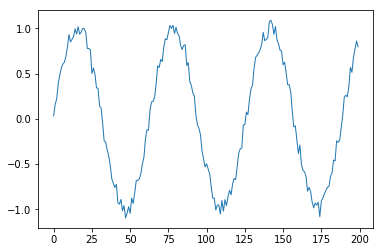

In [8]:
plt.plot(measurements[:200], label='measurements', linewidth=1)
plt.show()

In [9]:
X_train = measurements[:1000]
X_val = measurements[1000:]


print(X_val)

[-0.5878235128750159, -0.3711774634410359, -0.34918704709122816, -0.3278426690639774, -0.19845310161157462, -0.08625314700623148, 0.032811677268882344, 0.17688063765951928, 0.33775002742117155, 0.45644548949516156, 0.5436553058711846, 0.5971934964759665, 0.5310033371406818, 0.7274508745758689, 0.7374555984530348, 0.8881599367254127, 0.793654090253865, 1.0053660393466317, 0.8704528675442982, 0.9763113036407944, 0.9594568863808437, 1.0517672559850084, 0.9914985164862393, 1.0203374005748531, 0.9645444844879616, 0.9936572996428299, 0.9180023169516505, 0.7639926063795308, 0.805589273278686, 0.6033991496191619, 0.5513308204578256, 0.45097031845542485, 0.4399008639087224, 0.2728315995826751, 0.3502892020508449, 0.18724625033948306, 0.01715873944610312, 0.029023002773512222, -0.030583545020795216, -0.2244829101049968, -0.38908073707932994, -0.42540669656004537, -0.4406465783965833, -0.6828307613374369, -0.7068522526598154, -0.6700232511166562, -0.7823322392006761, -0.7576374702731709, -0.83782

In [11]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [14]:
raw_seq = list(X_train)
# choose a number of time steps
n_steps = 10
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [15]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
990/990 [==============================] - 2s 2ms/step - loss: 0.3203
Epoch 2/200
990/990 [==============================] - 0s 393us/step - loss: 0.1016
Epoch 3/200
990/990 [==============================] - 0s 393us/step - loss: 0.0447
Epoch 4/200
990/990 [==============================] - 0s 380us/step - loss: 0.0238
Epoch 5/200
990/990 [==============================] - 0s 386us/step - loss: 0.0093
Epoch 6/200
990/990 [==============================] - 0s 442us/step - loss: 0.0066
Epoch 7/200
990/990 [==============================] - 0s 394us/step - loss: 0.0075
Epoch 8/200
990/990 [==============================] - 0s 381us/step - loss: 0.0077 0s - loss: 0.
Epoch 9/200
990/990 [==============================] - 0s 385us/step - loss: 0.0062
Epoch 10/200
990/990 [==============================] - 0s 393us/step - loss: 0.0065
Epoch 11/200
990/990 [=====

990/990 [==============================] - 0s 399us/step - loss: 0.0053
Epoch 90/200
990/990 [==============================] - 0s 418us/step - loss: 0.0051
Epoch 91/200
990/990 [==============================] - 0s 391us/step - loss: 0.0053
Epoch 92/200
990/990 [==============================] - 0s 391us/step - loss: 0.0053
Epoch 93/200
990/990 [==============================] - 0s 397us/step - loss: 0.0049
Epoch 94/200
990/990 [==============================] - 0s 412us/step - loss: 0.0055
Epoch 95/200
990/990 [==============================] - 0s 383us/step - loss: 0.0054
Epoch 96/200
990/990 [==============================] - 0s 385us/step - loss: 0.0049
Epoch 97/200
990/990 [==============================] - 0s 384us/step - loss: 0.0049
Epoch 98/200
990/990 [==============================] - 0s 418us/step - loss: 0.0050
Epoch 99/200
990/990 [==============================] - 0s 388us/step - loss: 0.0050
Epoch 100/200
990/990 [==============================] - 0s 400us/step - loss:

990/990 [==============================] - 0s 392us/step - loss: 0.0045
Epoch 185/200
990/990 [==============================] - 0s 397us/step - loss: 0.0048
Epoch 186/200
990/990 [==============================] - 0s 396us/step - loss: 0.0048
Epoch 187/200
990/990 [==============================] - 0s 407us/step - loss: 0.0049
Epoch 188/200
990/990 [==============================] - 0s 414us/step - loss: 0.0044
Epoch 189/200
990/990 [==============================] - 0s 397us/step - loss: 0.0045
Epoch 190/200
990/990 [==============================] - 0s 396us/step - loss: 0.0043
Epoch 191/200
990/990 [==============================] - 0s 421us/step - loss: 0.0044
Epoch 192/200
990/990 [==============================] - 0s 416us/step - loss: 0.0047
Epoch 193/200
990/990 [==============================] - 0s 404us/step - loss: 0.0044
Epoch 194/200
990/990 [==============================] - 0s 409us/step - loss: 0.0043
Epoch 195/200
990/990 [==============================] - 0s 402us/st

In [16]:
X_v, y_v = split_sequence(list(X_val), n_steps)

In [17]:
X_validation = X_v.reshape((X_v.shape[0], X_v.shape[1], n_features))

In [20]:
yhat = model.predict(X_validation, verbose=0)
print(yhat)

[[ 0.44543695]
 [ 0.5475768 ]
 [ 0.6493486 ]
 ...
 [-0.17066963]
 [-0.23292251]
 [-0.31456324]]


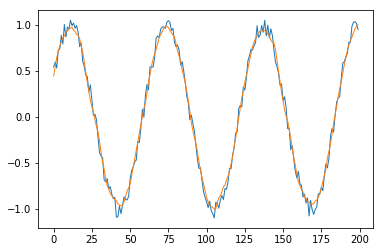

In [25]:
plt.plot(y_v[:200], label='true', linewidth=1)
plt.plot(yhat[:200], label='predicted', linewidth=1)
plt.show()

In [26]:
yhat_train = model.predict(X, verbose=0)
print(yhat_train)

[[ 8.29280376e-01]
 [ 8.76541972e-01]
 [ 9.05654609e-01]
 [ 9.23607767e-01]
 [ 9.35801029e-01]
 [ 9.54815149e-01]
 [ 9.58088040e-01]
 [ 9.49165821e-01]
 [ 9.14260030e-01]
 [ 8.79126370e-01]
 [ 8.69765162e-01]
 [ 8.80824208e-01]
 [ 8.67812097e-01]
 [ 7.98471689e-01]
 [ 7.21180260e-01]
 [ 6.60905004e-01]
 [ 5.36830544e-01]
 [ 4.33788300e-01]
 [ 3.43779027e-01]
 [ 2.43992895e-01]
 [ 1.67979881e-01]
 [ 6.63254932e-02]
 [-8.39029346e-03]
 [-1.12656079e-01]
 [-2.41286129e-01]
 [-3.43697846e-01]
 [-4.47252095e-01]
 [-5.25730014e-01]
 [-6.00929976e-01]
 [-6.86251640e-01]
 [-7.52080739e-01]
 [-8.11225593e-01]
 [-8.37361693e-01]
 [-8.84075999e-01]
 [-9.29301441e-01]
 [-9.44953918e-01]
 [-9.67705548e-01]
 [-9.64632630e-01]
 [-9.65472937e-01]
 [-9.55453992e-01]
 [-9.28627610e-01]
 [-9.13672149e-01]
 [-8.49528491e-01]
 [-8.17580163e-01]
 [-7.60655701e-01]
 [-6.62351847e-01]
 [-5.81234932e-01]
 [-4.96793151e-01]
 [-4.39363480e-01]
 [-3.58103871e-01]
 [-2.74288535e-01]
 [-1.77186012e-01]
 [-6.8275995

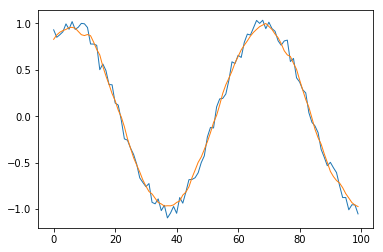

In [27]:
plt.plot(y[:100], label='true', linewidth=1)
plt.plot(yhat_train[:100], label='predicted', linewidth=1)
plt.show()